In [1]:
%autosave 60
%reload_ext autoreload
%autoreload 2

import sys

sys.path.insert(0, "..")

Autosaving every 60 seconds


In [2]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from src.tools.experiment_tracker import ExperimentTracker

In [ ]:
experiment_track = ExperimentTracker(
    project_name="Competitions/teta_nn_1_2025_predict_salary",
    task_name="Exploratory Data Analysis",
    config=None,
    use_clearml=True
)

ClearML Task: created new task id=9099bc1a7e0743eba4c1e3d601ea8815
ClearML results page: https://app.clear.ml/projects/8870d7f669ca45988ef171246b781921/experiments/9099bc1a7e0743eba4c1e3d601ea8815/output/log


KeyboardInterrupt: 

### TASK STOPPED - USER ABORTED - STATUS CHANGED ###


: 

# 1. Данные 

In [3]:
data_path = Path.cwd().parent / "src/data"

In [ ]:
df_train = pd.read_csv(data_path / "train.csv")
experiment_track.log_table(title="Тренировочные данные по вакансиям", series="", table=df_train.head())

df_train.head()

NameError: name 'experiment_track' is not defined

In [13]:
df_train

,title,location,company,skills,description,experience_from,salary_from,log_salary_from
0,Специалист технической поддержки,Воронеж,ВКТМ,NaN,Обязанности: Обеспечение бесперебойной раб...,1.0,60.0,4.094345
1,Product Owner в ИТ-стартап (B2C),Москва,Radium Finance,"CustDev, Стратегический менеджмент, Управление...","Эта вакансия про тебя, если симбиоз управленче...",6.0,200.0,5.298317
2,Системный администратор ( Клинический Госпитал...,Москва,Медскан,NaN,АО «Медскан» – динамично развивающаяся группа ...,1.0,130.0,4.867534
3,Системный Администратор Linux,Москва,Selecty,"Linux, PostgreSQL",Задачи: Администрирование инфраструктуры н...,3.0,170.0,5.135798
4,Начальник участка общестроительных работ,Пушкино (Московская область),NK GROUP,NaN,NK Group – ведущий девелопер индустриальных о...,3.0,200.0,5.298317
...,...,...,...,...,...,...,...,...
16662,Младший системный администратор (технический с...,Москва,АйПиМатика,NaN,Мы - активно растущий Value added дистрибьютор...,1.0,90.0,4.499810
16663,PHP-разработчик (1С-Битрикс),Барнаул,Киберия,"PHP, MySQL, PostgreSQL, Docker, Git, 1С-Битрик...","Привет! Мы, Киберия – активно развивающаяся ко...",1.0,60.0,4.094345
16664,Разработчик 1С,Москва,Lerteco,"1С программирование, 1С: Бухгалтерия, 1С: Пред...",В крупном холдинге-лидере цифровых решений во ...,3.0,340.0,5.828946
16665,Менеджер IT-проектов,Курск,Пластилин-арт (Осипов Ю.В.),"CRM, Битрикс24, Управление интернет-проектами,...",Пластилин-арт специализируется на разработке ...,1.0,45.0,3.806662


In [33]:
df_train["title"].nunique()

9890

# 2. Статистики и распределения
## 2.1. Word-skills в вакансиях 

In [57]:
skill_counts_in_vac = df_train["skills"].str.split(",").explode().str.lower().str.strip().value_counts()

print(f"Количество уникальных записей по skills: {skill_counts_in_vac.shape}")

Количество уникальных записей по skills: (7576,)


In [9]:
experiment_track.log_table("Word-skills в вакансиях", series="", table=skill_counts_in_vac.reset_index())
skill_counts_in_vac.head(20)

[2025-07-13 14:55:09] - root - INFO - [CLEARML] Table 'Word-skills в вакансиях' logged with shape (7576, 2)


skills
sql                                        1042
linux                                       891
техническая поддержка                       737
git                                         726
1с программирование                         715
настройка пк                                693
настройка сетевых подключений               656
adobe photoshop                             646
работа в команде                            627
администрирование сетевого оборудования     616
postgresql                                  602
python                                      598
грамотная речь                              590
настройка по                                550
1с: предприятие 8                           548
работа с большим объемом информации         509
javascript                                  496
аналитическое мышление                      487
деловая коммуникация                        469
пользователь пк                             464
Name: count, dtype: int64

### **Выводы**
Попробовать разделять word-skills:
- только по запятой
- по запятой и **"/"** (Но тут надо решить, что именно можно разделять через **"/"**, т.к., например, *a/b тестирование* **нельзя** так разделять)

Стоит ли учитывать семантические близкие скиллы? Если да, то тогда надо натренировать свой w2v, либо найти готовую модель, который может померять близость скиллов.

Имеется в одной вакансии такие skills-word :)
- потанцуем румбу
- сколько времени?
- гулять?
- время кончилось

## 2.2. Локации в вакансиях

In [56]:
location_in_vac = df_train["location"].str.lower().str.strip().value_counts()

print(f"Количество уникальных записей по location: {location_in_vac.shape}")

Количество уникальных записей по location: (558,)


In [32]:
experiment_track.log_table(title="Локации в вакансиях", series="", table=location_in_vac.reset_index())

location_in_vac.head(20)

[2025-07-13 18:27:02] - root - INFO - [CLEARML] Table 'Локации в вакансиях' logged with shape (558, 2)


location
москва             4933
санкт-петербург    1764
екатеринбург        570
новосибирск         413
краснодар           406
казань              405
нижний новгород     322
ростов-на-дону      281
челябинск           269
воронеж             251
владивосток         246
красноярск          235
пермь               212
уфа                 199
самара              190
тюмень              175
ярославль           141
барнаул             138
хабаровск           137
томск               136
Name: count, dtype: int64

### **Выводы**:
- Явно стоит чистить от станций метро в скобках, но оставлять области
- Также можно добавить области тем населенным пунктам, в которых явно не указано это.
    - Можно брать область из *api hh*, но только для не областных городов.
    - Найти другое бесплатное *api* или справочник

## 2.3. Названия компаний

In [59]:
company_in_vac = df_train["company"].str.lower().str.strip().value_counts()

print(f"Количество уникальных записей по company: {company_in_vac.shape}")

Количество уникальных записей по company: (9815,)


In [36]:
experiment_track.log_table(title="Названия компаний в вакансиях", series="", table=company_in_vac.reset_index())

company_in_vac.head(20)

[2025-07-13 18:57:06] - root - INFO - [CLEARML] Table 'Названия компаний в вакансиях' logged with shape (9815, 2)


company
ростелеком                        128
т-банк                            118
первый бит                        112
мтс                                60
сбер                               52
getmatch agency                    48
тензор                             45
магнит, розничная сеть             42
яндекс (поисковый портал)          39
dns технологии                     37
1c-рарус                           33
назаренко сергей александрович     33
дом.ру                             33
скб приморья примсоцбанк           30
иннотех                            30
т1                                 30
гринатом                           30
иващенко анатолий андреевич        30
softmaster                         30
почта россии                       29
Name: count, dtype: int64

### **Выводы**:
- Названия компаний дают в целом мало какой-то обощающей способоности. Модели, скорей всего, будут переобучаться на данной информации. По возможности лучше исключить.
- Можно доставать признак: род деятельности компании (специализация) по *api hh*

## 2.4. Нижняя граница предлагаемого диапазона заработной платы

In [61]:
df_train[["salary_from", "log_salary_from"]].describe()

,salary_from,log_salary_from
count,16667.000000,16667.000000
mean,111.980052,4.516523
std,77.474035,0.629785
min,5.100000,1.629241
25%,60.000000,4.094345
50%,90.000000,4.499810
75%,150.000000,5.010635
max,1000.000000,6.907755


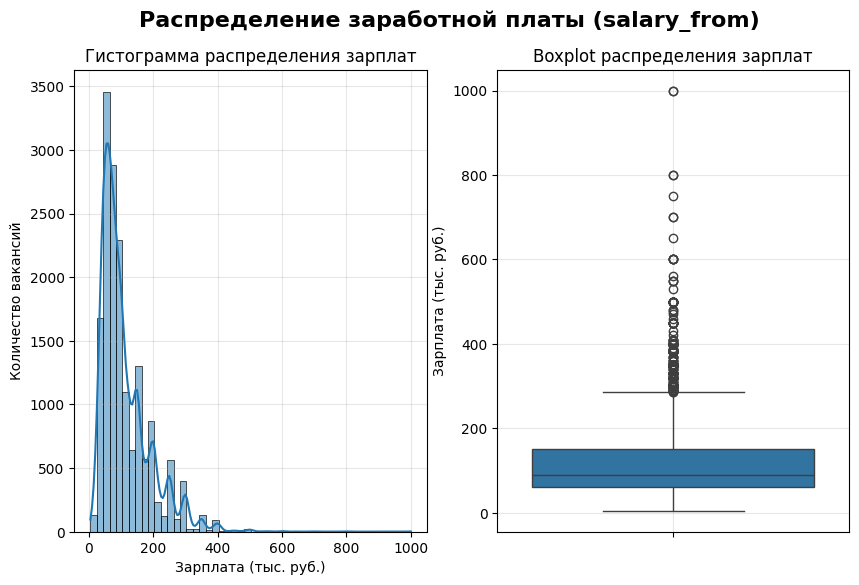

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Распределение заработной платы (salary_from)', fontsize=16, fontweight='bold')

sns.histplot(data=df_train, x='salary_from', bins=50, kde=True, ax=axes[0])
axes[0].set_title('Гистограмма распределения зарплат')
axes[0].set_xlabel('Зарплата (тыс. руб.)')
axes[0].set_ylabel('Количество вакансий')
axes[0].grid(True, alpha=0.3)

sns.boxplot(data=df_train, y='salary_from', ax=axes[1])
axes[1].set_title('Boxplot распределения зарплат')
axes[1].set_ylabel('Зарплата (тыс. руб.)')
axes[1].grid(True, alpha=0.3)

experiment_track.logger.report_matplotlib_figure(
    title="Распределение заработной платы",
    series="salary_from",
    figure=fig
)

plt.show()

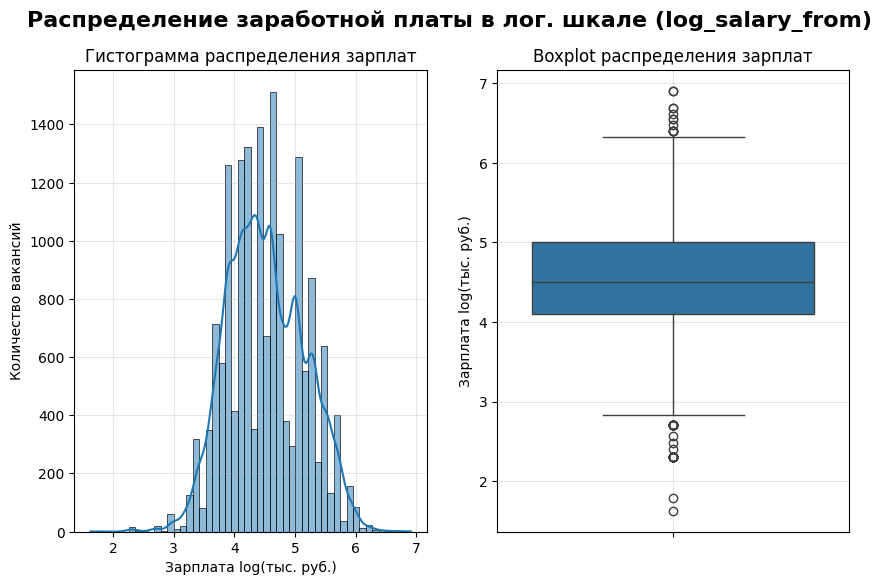

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Распределение заработной платы в лог. шкале (log_salary_from)', fontsize=16, fontweight='bold')

sns.histplot(data=df_train, x='log_salary_from', bins=50, kde=True, ax=axes[0])
axes[0].set_title('Гистограмма распределения зарплат')
axes[0].set_xlabel('Зарплата log(тыс. руб.)')
axes[0].set_ylabel('Количество вакансий')
axes[0].grid(True, alpha=0.3)

sns.boxplot(data=df_train, y='log_salary_from', ax=axes[1])
axes[1].set_title('Boxplot распределения зарплат')
axes[1].set_ylabel('Зарплата log(тыс. руб.)')
axes[1].grid(True, alpha=0.3)

experiment_track.logger.report_matplotlib_figure(
    title="Распределение заработной платы",
    series="log_salary_from",
    figure=fig
)

plt.show()

## 2.5. Минимальный требуемый опыт работы

[2025-07-13 19:35:17] - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-07-13 19:35:17] - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-07-13 19:35:17] - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-07-13 19:35:17] - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


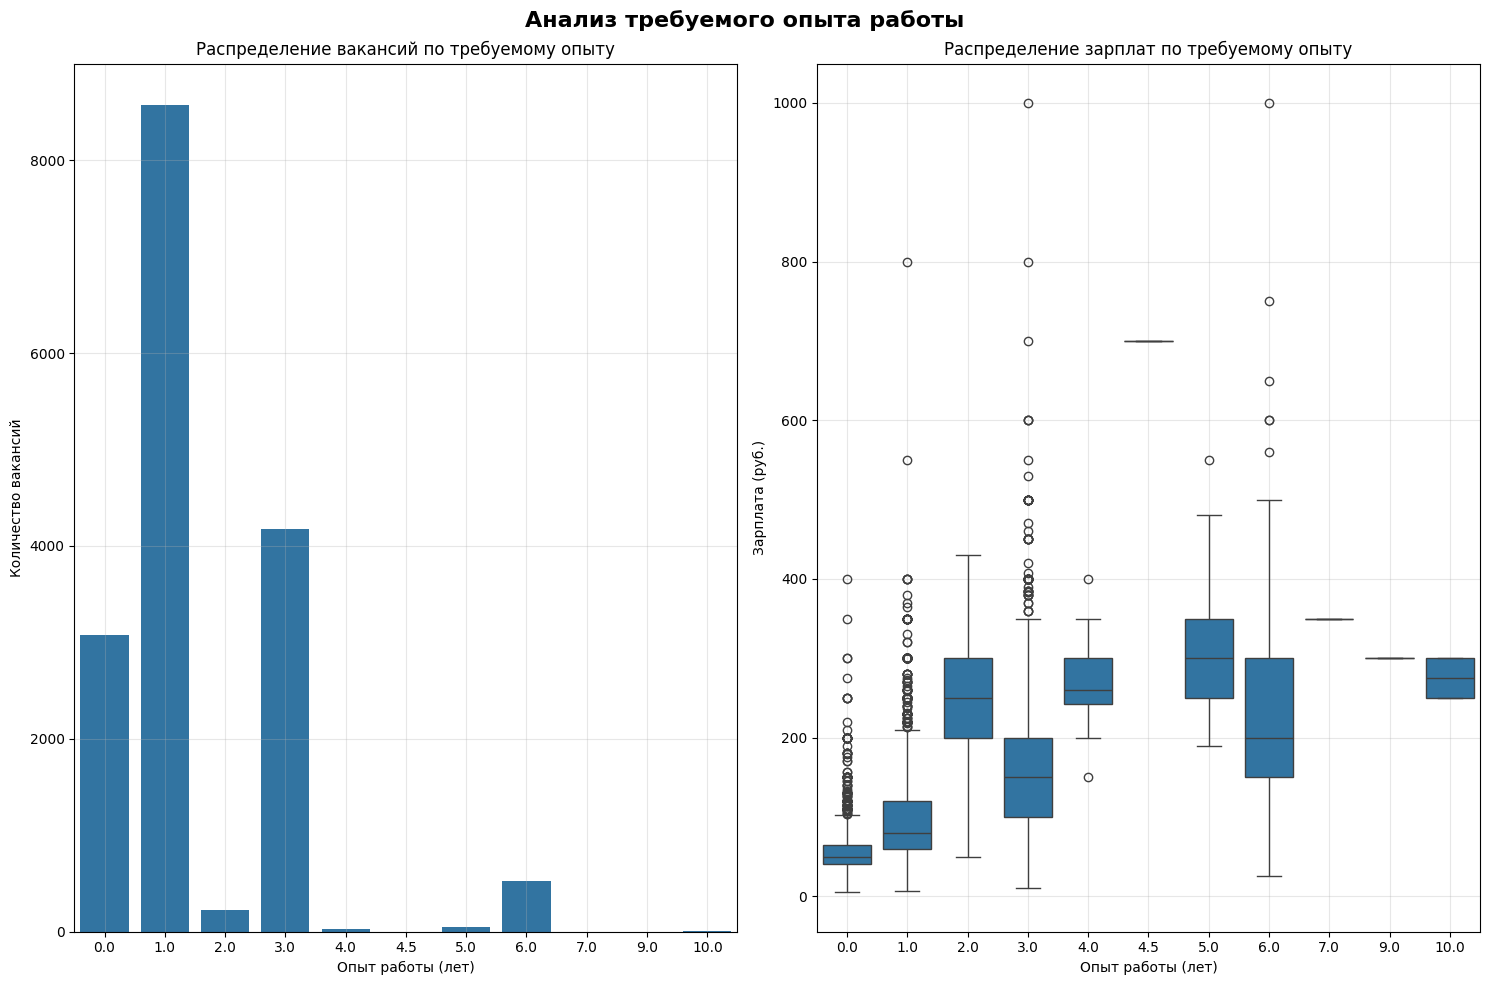

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Анализ требуемого опыта работы', fontsize=16, fontweight='bold')

sns.countplot(data=df_train, x='experience_from', ax=axes[0], order=sorted(df_train['experience_from'].unique()))
axes[0].set_title('Распределение вакансий по требуемому опыту')
axes[0].set_xlabel('Опыт работы (лет)')
axes[0].set_ylabel('Количество вакансий')
axes[0].grid(True, alpha=0.3)

sns.boxplot(data=df_train, x='experience_from', y='salary_from', ax=axes[1])
axes[1].set_title('Распределение зарплат по требуемому опыту')
axes[1].set_xlabel('Опыт работы (лет)')
axes[1].set_ylabel('Зарплата (руб.)')
axes[1].grid(True, alpha=0.3)

experiment_track.logger.report_matplotlib_figure(
    title="Распределение вакансий по опыту работы и оплате",
    series="",
    figure=fig
)

plt.tight_layout()
plt.show()

- Текст придется резать на смысловые части. Есть несколько подходов
    - Эвристиками и регулярками: ищем ключевые слова и делим на смысловые блоки
    - Натренировать модель, которая будет определять эти блоки. Либо по всему тексту (NER), либо кусками подавать в модель (классификация)
- Также надо предобработать текст, но пока неясно как

### Api HH
Поиск компании: `https://api.hh.ru/employers?text=...`  
Информация о компании: `https://api.hh.ru/employers/{employer_id}`. Нужно поле *industries*   
Справочник всех отраслей: `https://api.hh.ru/industries`  
Поиск региона: `https://api.hh.ru/suggests/areas?text=...`  

Поиск навыков по названию: `https://api.hh.ru/suggests/skill_set?text=...` - может быть пригодиться, но ищет очень плохо

In [73]:
experiment_track.close()

[2025-07-13 19:38:38] - root - INFO - [CLEARML] Closing task: 4e91330960084ef19a245a9d09a40353


In [61]:
import requests
import json
from tqdm import tqdm

In [32]:
df_train = pd.read_csv(data_path / "train.csv")

In [37]:
location = df_train.sample(1)["location"].iloc[0]

print(location)

req = requests.get(f"https://api.hh.ru/suggests/areas?text={location}")

Шахты


In [38]:
req.text

'{"items":[{"id":"1552","text":"Шахты","url":"https://api.hh.ru/areas/1552"},{"id":"11697","text":"Шахты Южная","url":"https://api.hh.ru/areas/11697"}]}'

In [66]:
companies_ulrs = []

def search_company(company: str):
    req = requests.get("https://api.hh.ru/employers", params={
    "text": company,
    "sort_by": "by_vacancies_open",
    "per_page": 20
    })

    companies: dict = json.loads(req.text)["items"]
    if companies:
        for c in companies:
            if c["name"] == company.strip():
                return c["url"]


for row in tqdm(df_train["company"].unique()):
    companies_ulrs.append(search_company(row))

  0%|          | 0/9866 [00:00<?, ?it/s]

  1%|          | 54/9866 [00:21<1:05:45,  2.49it/s]


KeyboardInterrupt: 

In [60]:
from tqdm import tqdm

In [ ]:
import asyncio
import aiohttp
import json
from tqdm.asyncio import tqdm
import time

async def search_company(session, company: str):
    """Асинхронный поиск компании"""
    try:
        params = {
            "text": company,
            "sort_by": "by_vacancies_open", 
            "per_page": 20
        }
        
        async with session.get("https://api.hh.ru/employers", params=params) as response:
            if response.status == 200:
                data = await response.json()
                companies = data.get("items", [])
                
                if companies:
                    for c in companies:
                        if c["name"] == company.strip():
                            return c["url"]
            return None
            
    except Exception as e:
        print(f"Ошибка для компании '{company}': {e}")
        return None

async def process_companies_async(companies, max_concurrent=10, delay=0.1):
    """
    Асинхронная обработка списка компаний
    
    Args:
        companies: список названий компаний
        max_concurrent: максимальное количество одновременных запросов
        delay: задержка между запросами
    """
    
    # Семафор для ограничения количества одновременных запросов
    semaphore = asyncio.Semaphore(max_concurrent)
    
    async def fetch_with_semaphore(session, company):
        async with semaphore:
            result = await search_company(session, company)
            if delay > 0:
                await asyncio.sleep(delay)
            return result
    
    # Создаем сессию для переиспользования подключений
    async with aiohttp.ClientSession(timeout=aiohttp.ClientTimeout(total=30)) as session:
        # Запускаем все задачи параллельно
        tasks = [fetch_with_semaphore(session, company) for company in companies]
        
        # Выполняем с прогресс-баром
        results = await tqdm.gather(*tasks, desc="Поиск компаний")
        
    return results

# Запуск асинхронной функции
async def main():
    # Берем уникальные компании для экономии запросов
    unique_companies = df_train["company"].dropna().unique().tolist()
    
    print(f"Обрабатываем {len(unique_companies)} уникальных компаний...")
    
    start_time = time.time()
    
    # Запускаем асинхронную обработку
    companies_urls = await process_companies_async(
        unique_companies, 
        max_concurrent=15,  # Количество одновременных запросов
        delay=0.05  # Задержка между запросами в секундах
    )
    
    end_time = time.time()
    
    print(f"Обработка завершена за {end_time - start_time:.2f} секунд")
    print(f"Найдено URL для {sum(1 for url in companies_urls if url is not None)} компаний")

    company_url_mapping = dict(zip(unique_companies, companies_urls))
    
    return company_url_mapping

# Запуск
companies_urls = await main()

Обрабатываем 9866 уникальных компаний...


Поиск компаний:   0%|          | 0/9866 [00:00<?, ?it/s]

Поиск компаний: 100%|██████████| 9866/9866 [01:26<00:00, 113.54it/s]

Обработка завершена за 86.91 секунд
Найдено URL для 9416 компаний


In [72]:
companies_urls

{'ВКТМ': 'https://api.hh.ru/employers/6010027',
 'Radium Finance': None,
 'Медскан': 'https://api.hh.ru/employers/3859980',
 'Selecty': 'https://api.hh.ru/employers/2406247',
 'NK GROUP': 'https://api.hh.ru/employers/704368',
 'СибТрансАвто': 'https://api.hh.ru/employers/3523766',
 'Лайтхаус Интериорс': 'https://api.hh.ru/employers/9649647',
 'КрасИнтегра': 'https://api.hh.ru/employers/3289110',
 'Единая Европа-Элит и сеть магазинов СТИЛЬПАРК': 'https://api.hh.ru/employers/14703',
 'PLAYMAKERS': 'https://api.hh.ru/employers/10660532',
 'Россети Московский регион': 'https://api.hh.ru/employers/103816',
 'Центр Бытового Ремонта': None,
 'Международный аэропорт Пермь': 'https://api.hh.ru/employers/560799',
 'СЗ РЦАИ': 'https://api.hh.ru/employers/1647549',
 'Девелопер. Мы строим\xa0объекты в Москве — многофункциональные комплексы, жилую и коммерческую недвижимость.': None,
 'Бьюти Лайф': 'https://api.hh.ru/employers/3448319',
 'Уфанет': 'https://api.hh.ru/employers/668351',
 'EGO BOTTEGO'

In [76]:
with open("companies.json", "w", encoding="utf-8") as f:
    json.dump(companies_urls, f, ensure_ascii=False, indent=4)

In [83]:
req = requests.get("https://api.hh.ru/employers/999442")

In [86]:
async def fetch_industries(session, url):
    """Асинхронный запрос для получения industries компании."""
    try:
        async with session.get(url) as response:
            if response.status == 200:
                data = await response.json()
                industries = data.get("industries", [])
                return {url: industries}
            else:
                print(f"Ошибка {response.status} для URL: {url}")
                return {url: []}
    except Exception as e:
        print(f"Ошибка для URL {url}: {e}")
        return {url: None}

async def fetch_all_industries(urls, max_concurrent=10):
    """Асинхронный сбор industries для всех компаний."""
    semaphore = asyncio.Semaphore(max_concurrent)

    async def fetch_with_semaphore(session, url):
        async with semaphore:
            return await fetch_industries(session, url)

    async with aiohttp.ClientSession(timeout=aiohttp.ClientTimeout(total=30)) as session:
        tasks = [fetch_with_semaphore(session, url) for url in urls]
        results = await tqdm.gather(*tasks, desc="Сбор industries")
    return results

# Загрузка сохраненных ссылок компаний
with open("companies.json", "r", encoding="utf-8") as f:
    companies_urls = json.load(f)

# Фильтруем только существующие ссылки
valid_urls = [url for url in companies_urls.values() if url]

# Асинхронный запуск
industries_data = await fetch_all_industries(valid_urls)

# Преобразуем результаты в словарь
industries_mapping = {k: v for result in industries_data for k, v in result.items()}

# Сохраняем результаты в файл
with open("industries.json", "w", encoding="utf-8") as f:
    json.dump(industries_mapping, f, ensure_ascii=False, indent=4)

Сбор industries: 100%|██████████| 9416/9416 [01:37<00:00, 96.24it/s] 


In [91]:
count_nan = 0
for i in industries_mapping.values():
    if not i:
        count_nan += 1

count_nan

3715

In [85]:
!curl https://api.hh.ru/industries

[{"id":"5","name":"Перевозки, логистика, склад, ВЭД","industries":[{"id":"5.461","name":"Авиаперевозки"},{"id":"5.462","name":"Автомобильные перевозки"},{"id":"5.463","name":"Железнодорожные перевозки"},{"id":"5.464","name":"Морские, речные перевозки"},{"id":"5.465","name":"Транспортно-логистические комплексы, порты (воздушный, водный, железнодорожный)"},{"id":"5.466","name":"Складские услуги"},{"id":"5.467","name":"Курьерская, почтовая доставка"},{"id":"5.468","name":"ВЭД, таможенное оформление"}]},{"id":"7","name":"Информационные технологии, системная интеграция, интернет","industries":[{"id":"7.538","name":"Интернет-провайдер"},{"id":"7.539","name":"Системная интеграция,  автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг"},{"id":"7.540","name":"Разработка программного обеспечения"},{"id":"7.541","name":"Интернет-компания (поисковики, платежные системы, соц.сети, информационно-познавательные и развлекательные ресурсы, продвижение сайтов и прочее)"}]},{"id":"

In [ ]:
import pandas as pd
import json

In [43]:
with open("companies.json") as f:
    companies = json.load(f)

with open("industries.json") as f:
    industries = json.load(f)

In [44]:
companies = pd.DataFrame.from_dict(companies, orient="index").reset_index().rename(columns={
    "index": "company",
    0: "url_companies"
})

In [45]:
industries = pd.DataFrame.from_dict(industries, orient="index").reset_index().rename(columns={
    "index": "url_companies"
})

In [46]:
companies_temp = companies.merge(
    industries,
    how="inner",
    on="url_companies"
)

In [49]:
companies_temp

,company,url_companies,0,1,2,3,4
0,ВКТМ,https://api.hh.ru/employers/6010027,None,None,None,None,None
1,Медскан,https://api.hh.ru/employers/3859980,"{'id': '48.681', 'name': 'Лечебно-профилактиче...","{'id': '48.680', 'name': 'Лаборатория, исследо...","{'id': '48.679', 'name': 'Клинические исследов...",None,None
2,Selecty,https://api.hh.ru/employers/2406247,"{'id': '44.391', 'name': 'Кадровые агентства'}",None,None,None,None
3,NK GROUP,https://api.hh.ru/employers/704368,"{'id': '13.662', 'name': 'Строительство дорожн...","{'id': '13.659', 'name': 'Строительство промыш...","{'id': '13.654', 'name': 'Девелопмент'}",None,None
4,СибТрансАвто,https://api.hh.ru/employers/3523766,None,None,None,None,None
...,...,...,...,...,...,...,...
9411,Зигмунд Онлайн,https://api.hh.ru/employers/3927492,"{'id': '7.541', 'name': 'Интернет-компания (по...","{'id': '7.540', 'name': 'Разработка программно...",None,None,None
9412,Datana,https://api.hh.ru/employers/10513122,"{'id': '7.540', 'name': 'Разработка программно...",None,None,None,None
9413,СК Анастасия,https://api.hh.ru/employers/133973,"{'id': '13.661', 'name': 'Строительство жилищн...","{'id': '13.660', 'name': 'Строительство коммер...","{'id': '13.659', 'name': 'Строительство промыш...","{'id': '51.672', 'name': 'Ремонт зданий и соор...","{'id': '51.671', 'name': 'Благоустройство и уб..."
9414,Пластилин-арт (Осипов Ю.В.),https://api.hh.ru/employers/1092280,None,None,None,None,None


In [69]:
companies_explode = []

for row in tqdm(companies_temp.iterrows(), total=len(companies_temp)):
    companies_info_industries = []
    for i in range(5):
        if row[1][i]:
            companies_explode.append([row[1]["company"], row[1][i]["id"], row[1][i]["name"]])

100%|██████████| 9416/9416 [00:00<00:00, 23632.43it/s]


In [71]:
companies_explode = pd.DataFrame(companies_explode)

In [73]:
companies_explode = companies_explode.rename(columns={
    0: "company",
    1: "id",
    2: "name_ind"
})

In [75]:
companies_explode.groupby(by="company").head(5)

,company,id,name_ind
0,Медскан,48.681,Лечебно-профилактические учреждения
1,Медскан,48.680,"Лаборатория, исследовательский центр"
2,Медскан,48.679,Клинические исследования
3,Selecty,44.391,Кадровые агентства
4,NK GROUP,13.662,Строительство дорожное и инфраструктурное
...,...,...,...
12795,СК Анастасия,13.659,Строительство промышленное
12796,СК Анастасия,51.672,Ремонт зданий и сооружений
12797,СК Анастасия,51.671,Благоустройство и уборка территорий и зданий
12798,IT-Лидер,7.541,"Интернет-компания (поисковики, платежные систе..."


In [85]:
result = companies_explode.groupby("company").apply(
    lambda group: group.head(4).reset_index(drop=True)
).reset_index(drop=True)

result["group_index"] = result.groupby("company").cumcount()

/tmp/ipykernel_1691/1685527406.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = companies_explode.groupby("company").apply(


In [88]:
result_pivot = result.pivot(index="company", columns="group_index", values=["id", "name_ind"])

In [89]:
result_pivot.columns = [f"{col[0]}_{col[1]+1}" for col in result_pivot.columns]

In [90]:
result_pivot

,id_1,id_2,id_3,id_4,name_ind_1,name_ind_2,name_ind_3,name_ind_4
company,,,,,,,,
#dieztech,7.541,7.540,11.459,NaN,"Интернет-компания (поисковики, платежные систе...",Разработка программного обеспечения,"Маркетинговые, рекламные, BTL, дизайнерские, E...",NaN
1 Мегамир,7.541,7.540,7.539,NaN,"Интернет-компания (поисковики, платежные систе...",Разработка программного обеспечения,"Системная интеграция, автоматизации технологи...",NaN
1 Московская Зеркальная фабрика,388.499,41.525,41.513,41.512,"Оборудование и станки для добывающей, энергети...",Интернет-магазин,Розничная сеть (мебель),"Розничная сеть (drogerie, товары повседневного..."
1-й Советник,7.539,NaN,NaN,NaN,"Системная интеграция, автоматизации технологи...",NaN,NaN,NaN
101 Интернет,7.541,9.402,9.401,9.400,"Интернет-компания (поисковики, платежные систе...",Спутниковая связь,Оптоволоконная связь,Фиксированная связь
...,...,...,...,...,...,...,...,...
"айФлекс, компания",7.539,NaN,NaN,NaN,"Системная интеграция, автоматизации технологи...",NaN,NaN,NaN
билайн,7.538,7.539,9.400,9.399,Интернет-провайдер,"Системная интеграция, автоматизации технологи...",Фиксированная связь,Мобильная связь
бобдей,44.393,7.540,7.539,NaN,Консалтинговые услуги,Разработка программного обеспечения,"Системная интеграция, автоматизации технологи...",NaN
